X shape: (100, 2)
y shape: (100,)


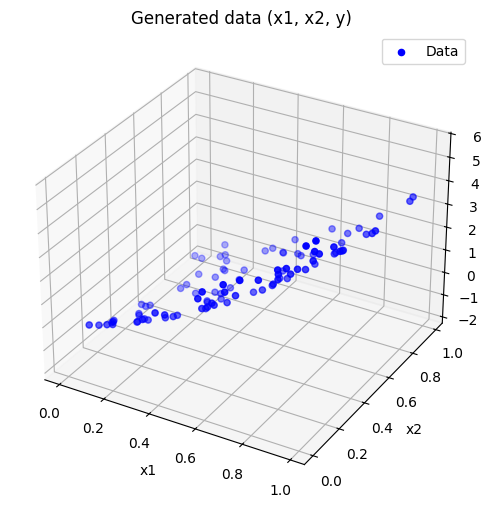

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(42)  # for repeatability of results

# Generate 100 random values for x1 and x2 from range [0, 1)
x1 = np.random.rand(100)
x2 = np.random.rand(100)


def polynomial(x1, x2):
    return 4 * x1**2 + 5 * x2**2 - 2 * x1 * x2 + 3 * x1 - 6 * x2

# Calculate y
y = polynomial(x1, x2)

# combine x1 і x2 in one matrix jf value (size 100×2)
X = np.column_stack((x1, x2))

print("X shape:", X.shape)  # (100, 2)
print("y shape:", y.shape)  # (100,)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, y, c='blue', label='Data')
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Generated data (x1, x2, y)")
plt.legend()
plt.show()

In [71]:
# Creating additional polinomial features

poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly.fit_transform(X)

print("Form X before conversion:", X.shape)
print("Form X after polinimial spred:", X_poly.shape)
print("Names of created features:", poly.get_feature_names_out())

Form X before conversion: (100, 2)
Form X after polinimial spred: (100, 5)
Names of created features: ['x0' 'x1' 'x0^2' 'x0 x1' 'x1^2']


In [72]:
def polynomial_regression_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    m, n = X.shape

    # Inizialize the weights with zeros
    theta = np.zeros(n)

    # Array to store errors for each steps (for analisis)
    loss_history = []

    for iteration in range(n_iterations):
        # Calculate the forecast: y_hat = X @ theta
        y_pred = X @ theta

        # Calculate the error
        error = y_pred - y

        # Gradient
        gradient = (2/m) * X.T @ error

        # Weight update
        theta = theta - learning_rate * gradient

        # Calculate MSE and save
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        # We remove each 100 iterration
        if iteration % 100 == 0:
            print(f"Ітерація {iteration}: MSE = {loss:.5f}")

    return theta, loss_history


Ітерація 0: MSE = 4.28610
Ітерація 100: MSE = 0.26244
Ітерація 200: MSE = 0.21412
Ітерація 300: MSE = 0.17788
Ітерація 400: MSE = 0.14907
Ітерація 500: MSE = 0.12573
Ітерація 600: MSE = 0.10656
Ітерація 700: MSE = 0.09064
Ітерація 800: MSE = 0.07732
Ітерація 900: MSE = 0.06612

The obtained coefficients:
[ 2.1230417  -3.86012332  3.93787682 -0.50291557  2.13879421]


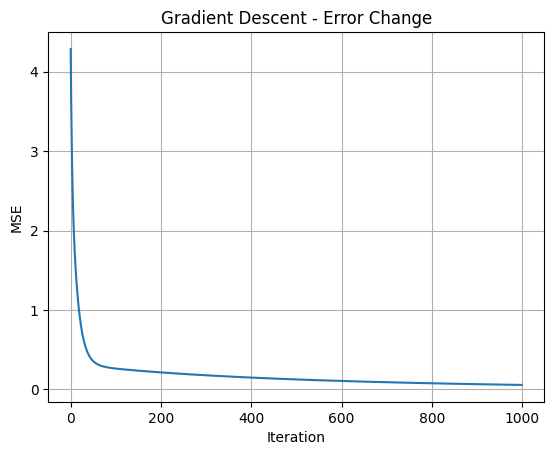

In [73]:
# We train the model
theta_gd, loss_gd = polynomial_regression_gradient_descent(X_poly, y, learning_rate=0.1, n_iterations=1000)

print("\nThe obtained coefficients:")
print(theta_gd)

plt.plot(loss_gd)
plt.title("Gradient Descent - Error Change")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


In [74]:
def polynomial_regression_SGD(X, y, learning_rate=0.01, n_epochs=50):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for epoch in range(n_epochs):
        # Shuffle the indices for the era
        indices = np.random.permutation(m)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        for i in range(m):
            xi = X_shuffled[i:i+1]
            yi = y_shuffled[i]

            # Prediction
            prediction = xi @ theta

            # Gradient on one example
            gradient = 2 * xi.T * (prediction - yi)

            # Renewal
            theta -= learning_rate * gradient.flatten()

        # We estimate the error after each epoch
        y_pred = X @ theta
        loss = np.mean((y_pred - y)**2)
        loss_history.append(loss)

        print(f"Epoch {epoch+1}: MSE = {loss:.5f}")

    return theta, loss_history


Epoch 1: MSE = 0.28096
Epoch 2: MSE = 0.25086
Epoch 3: MSE = 0.17724
Epoch 4: MSE = 0.16001
Epoch 5: MSE = 0.13011
Epoch 6: MSE = 0.10212
Epoch 7: MSE = 0.11868
Epoch 8: MSE = 0.07761
Epoch 9: MSE = 0.06442
Epoch 10: MSE = 0.05573
Epoch 11: MSE = 0.04726
Epoch 12: MSE = 0.05710
Epoch 13: MSE = 0.04232
Epoch 14: MSE = 0.03128
Epoch 15: MSE = 0.02789
Epoch 16: MSE = 0.03270
Epoch 17: MSE = 0.01994
Epoch 18: MSE = 0.01685
Epoch 19: MSE = 0.01602
Epoch 20: MSE = 0.01567
Epoch 21: MSE = 0.01139
Epoch 22: MSE = 0.00969
Epoch 23: MSE = 0.00898
Epoch 24: MSE = 0.00756
Epoch 25: MSE = 0.00705
Epoch 26: MSE = 0.00556
Epoch 27: MSE = 0.00486
Epoch 28: MSE = 0.00426
Epoch 29: MSE = 0.00383
Epoch 30: MSE = 0.00359
Epoch 31: MSE = 0.00360
Epoch 32: MSE = 0.00364
Epoch 33: MSE = 0.00223
Epoch 34: MSE = 0.00246
Epoch 35: MSE = 0.00172
Epoch 36: MSE = 0.00152
Epoch 37: MSE = 0.00151
Epoch 38: MSE = 0.00118
Epoch 39: MSE = 0.00105
Epoch 40: MSE = 0.00107
Epoch 41: MSE = 0.00091
Epoch 42: MSE = 0.00071
E

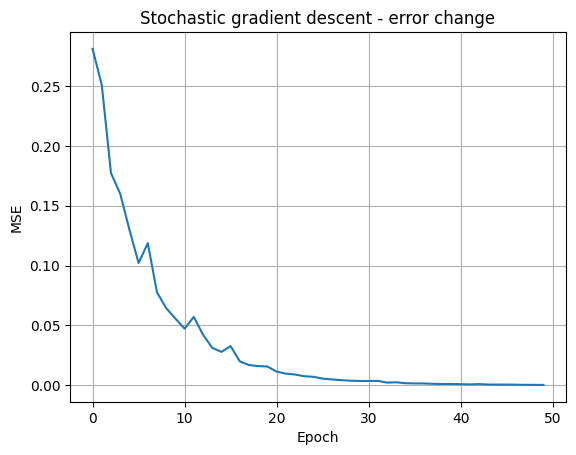

In [75]:
theta_sgd, loss_sgd = polynomial_regression_SGD(X_poly, y, learning_rate=0.1, n_epochs=50)

print("\nCoefficient after SGD:")
print(theta_sgd)
plt.plot(loss_sgd)
plt.title("Stochastic gradient descent - error change")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


Iteration 0: MSE = 4.28610
Iteration 100: MSE = 1.40014
Iteration 200: MSE = 0.39327
Iteration 300: MSE = 0.20417
Iteration 400: MSE = 0.11365
Iteration 500: MSE = 0.06179
Iteration 600: MSE = 0.02972
Iteration 700: MSE = 0.01108
Iteration 800: MSE = 0.00340
Iteration 900: MSE = 0.00111

Coefficients after RMSProp:
[ 2.8474792  -5.81832854  4.13848071 -1.96254422  4.81891824]


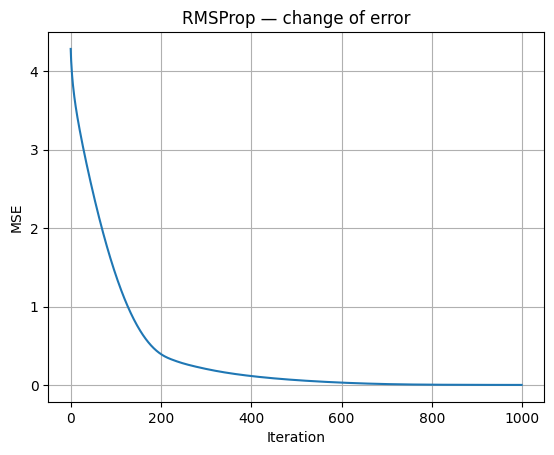

In [76]:
def polynomial_regression_rmsprop(X, y, learning_rate=0.01, n_iterations=1000, rho=0.9, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    s = np.zeros(n)  # Initialize the gradient squares accumulator
    loss_history = []

    for iteration in range(n_iterations):
        # Forcast
        y_pred = X @ theta

        # Gradient
        error = y_pred - y
        gradient = (2/m) * (X.T @ error)

        # The accumulator update
        s = rho * s + (1 - rho) * (gradient ** 2)

        # Update of values with normalization
        theta -= learning_rate * gradient / (np.sqrt(s) + epsilon)

        # Error
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        if iteration % 100 == 0:
            print(f"Iteration {iteration}: MSE = {loss:.5f}")

    return theta, loss_history

theta_rmsprop, loss_rmsprop = polynomial_regression_rmsprop(X_poly, y, learning_rate=0.01, n_iterations=1000)

print("\nCoefficients after RMSProp:")
print(theta_rmsprop)

plt.plot(loss_rmsprop)
plt.title("RMSProp — change of error")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()



Iteration 100: MSE = 1.75199
Iteration 200: MSE = 0.74063
Iteration 300: MSE = 0.41846
Iteration 400: MSE = 0.31896
Iteration 500: MSE = 0.26820
Iteration 600: MSE = 0.22776
Iteration 700: MSE = 0.19227
Iteration 800: MSE = 0.16099
Iteration 900: MSE = 0.13359
Iteration 1000: MSE = 0.10973

Coefficient after Adam:
[ 2.48431531 -3.80803288  2.86262083  0.81442481  1.58569333]


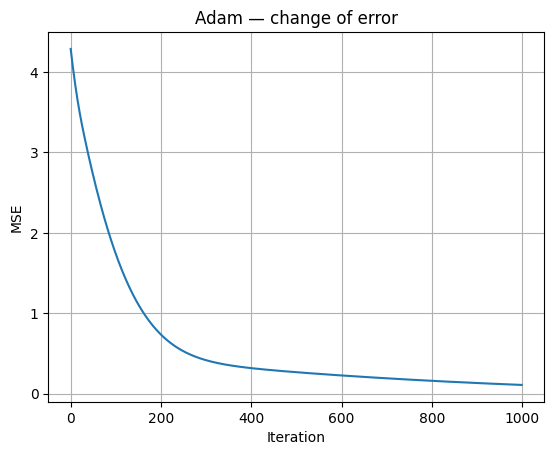

In [77]:
def polynomial_regression_adam(X, y, learning_rate=0.01, n_iterations=1000,
                                beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    loss_history = []

    for t in range(1, n_iterations + 1):
        y_pred = X @ theta
        error = y_pred - y
        gradient = (2 / m) * (X.T @ error)

        # Updating moments
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)

        # Adjusted moments
        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)

        # Update of values
        theta -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

        # Loss
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        if t % 100 == 0:
            print(f"Iteration {t}: MSE = {loss:.5f}")

    return theta, loss_history
theta_adam, loss_adam = polynomial_regression_adam(X_poly, y, learning_rate=0.01, n_iterations=1000)

print("\nCoefficient after Adam:")
print(theta_adam)
plt.plot(loss_adam)
plt.title("Adam — change of error")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


Iteration 100: MSE = 1.69894
Iteration 200: MSE = 0.71811
Iteration 300: MSE = 0.41009
Iteration 400: MSE = 0.31325
Iteration 500: MSE = 0.26195
Iteration 600: MSE = 0.22096
Iteration 700: MSE = 0.18534
Iteration 800: MSE = 0.15426
Iteration 900: MSE = 0.12724
Iteration 1000: MSE = 0.10388
\Coefficients after Nadam:
[ 2.50760676 -3.91899265  2.87309497  0.78170712  1.72173208]


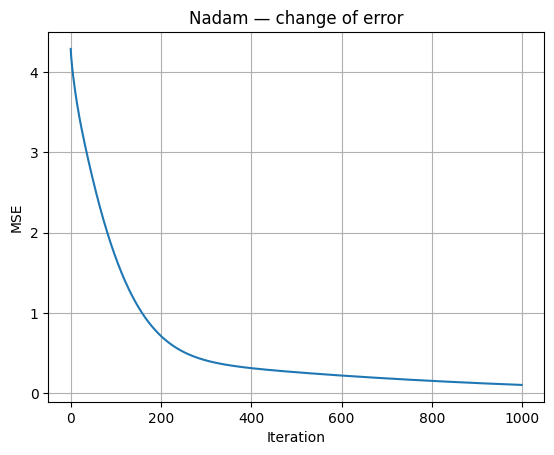

In [78]:
def polynomial_regression_nadam(X, y, learning_rate=0.01, n_iterations=1000,
                                 beta1=0.9, beta2=0.999, epsilon=1e-8):
    m, n = X.shape
    theta = np.zeros(n)
    m_t = np.zeros(n)
    v_t = np.zeros(n)
    loss_history = []

    for t in range(1, n_iterations + 1):
        y_pred = X @ theta
        error = y_pred - y
        gradient = (2 / m) * (X.T @ error)

        # Updating moments
        m_t = beta1 * m_t + (1 - beta1) * gradient
        v_t = beta2 * v_t + (1 - beta2) * (gradient ** 2)

        # Adjusted moments
        m_hat = m_t / (1 - beta1 ** t)
        v_hat = v_t / (1 - beta2 ** t)

        # Nadam update (advance)
        nesterov = (beta1 * m_hat + (1 - beta1) * gradient / (1 - beta1 ** t))
        theta -= learning_rate * nesterov / (np.sqrt(v_hat) + epsilon)

        # Loss
        loss = np.mean(error ** 2)
        loss_history.append(loss)

        if t % 100 == 0:
            print(f"Iteration {t}: MSE = {loss:.5f}")

    return theta, loss_history
theta_nadam, loss_nadam = polynomial_regression_nadam(X_poly, y, learning_rate=0.01, n_iterations=1000)

print("\Coefficients after Nadam:")
print(theta_nadam)
plt.plot(loss_nadam)
plt.title("Nadam — change of error")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.show()


Ітерація 0: MSE = 4.28610
Ітерація 100: MSE = 1.63486
Ітерація 200: MSE = 0.93140
polynomial_regression_gradient_descent finished for 0.0048 seconds
Epoch 1: MSE = 1.63434
Epoch 2: MSE = 0.92865
Epoch 3: MSE = 0.59523
Epoch 4: MSE = 0.43411
Epoch 5: MSE = 0.35575
Epoch 6: MSE = 0.31449
Epoch 7: MSE = 0.29164
Epoch 8: MSE = 0.27959
Epoch 9: MSE = 0.26866
Epoch 10: MSE = 0.26184
Epoch 11: MSE = 0.25789
Epoch 12: MSE = 0.25175
Epoch 13: MSE = 0.24560
Epoch 14: MSE = 0.24032
Epoch 15: MSE = 0.23548
Epoch 16: MSE = 0.23111
Epoch 17: MSE = 0.22632
Epoch 18: MSE = 0.22319
Epoch 19: MSE = 0.21775
Epoch 20: MSE = 0.21477
Epoch 21: MSE = 0.20983
Epoch 22: MSE = 0.20678
Epoch 23: MSE = 0.20202
Epoch 24: MSE = 0.19804
Epoch 25: MSE = 0.19508
Epoch 26: MSE = 0.19094
Epoch 27: MSE = 0.18767
Epoch 28: MSE = 0.18397
Epoch 29: MSE = 0.18112
Epoch 30: MSE = 0.17759
Epoch 31: MSE = 0.17427
Epoch 32: MSE = 0.17119
Epoch 33: MSE = 0.16816
Epoch 34: MSE = 0.16516
Epoch 35: MSE = 0.16243
Epoch 36: MSE = 0.15

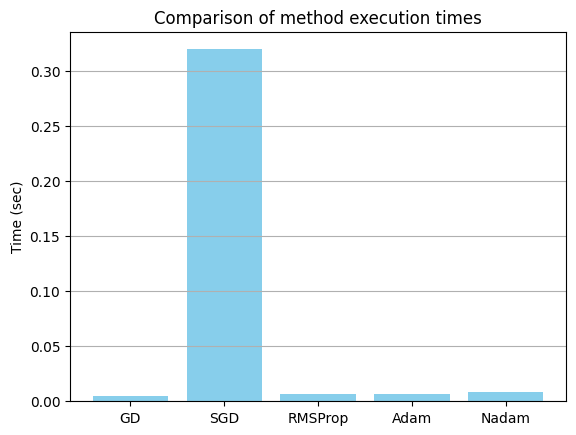

In [79]:
# Number of iterations for measurement
n_iter_test = 300

# Time measurement function
def measure_time(func, X, y, param_name="n_iterations", param_value=300, **kwargs):
    start = time.perf_counter()
    theta, loss = func(X, y, **{param_name: param_value}, **kwargs)
    end = time.perf_counter()
    print(f"{func.__name__} finished for {end - start:.4f} seconds")
    return end - start

time_gd = measure_time(polynomial_regression_gradient_descent, X_poly, y)
time_sgd = measure_time(polynomial_regression_SGD, X_poly, y, param_name="n_epochs")
time_rms = measure_time(polynomial_regression_rmsprop, X_poly, y)
time_adam = measure_time(polynomial_regression_adam, X_poly, y)
time_nadam = measure_time(polynomial_regression_nadam, X_poly, y)

methods = ['GD', 'SGD', 'RMSProp', 'Adam', 'Nadam']
times = [time_gd, time_sgd, time_rms, time_adam, time_nadam]

plt.bar(methods, times, color='skyblue')
plt.title("Comparison of method execution times")
plt.ylabel("Time (sec)")
plt.grid(axis='y')
plt.show()


Ітерація 0: MSE = 4.28610
Ітерація 100: MSE = 1.63486
Ітерація 200: MSE = 0.93140
Ітерація 300: MSE = 0.60241
Ітерація 400: MSE = 0.44069
Ітерація 500: MSE = 0.35947
Ітерація 600: MSE = 0.31722
Ітерація 700: MSE = 0.29385
Ітерація 800: MSE = 0.27969
Ітерація 900: MSE = 0.27006
Epoch 1: MSE = 1.62845
Epoch 2: MSE = 0.93552
Epoch 3: MSE = 0.60158
Epoch 4: MSE = 0.44068
Epoch 5: MSE = 0.36137
Epoch 6: MSE = 0.31768
Epoch 7: MSE = 0.29485
Epoch 8: MSE = 0.28201
Epoch 9: MSE = 0.27014
Epoch 10: MSE = 0.26308
Epoch 11: MSE = 0.25672
Epoch 12: MSE = 0.25087
Epoch 13: MSE = 0.24544
Epoch 14: MSE = 0.24057
Epoch 15: MSE = 0.23616
Epoch 16: MSE = 0.23146
Epoch 17: MSE = 0.22662
Epoch 18: MSE = 0.22212
Epoch 19: MSE = 0.21784
Epoch 20: MSE = 0.21391
Epoch 21: MSE = 0.20966
Epoch 22: MSE = 0.20572
Epoch 23: MSE = 0.20191
Epoch 24: MSE = 0.19816
Epoch 25: MSE = 0.19466
Epoch 26: MSE = 0.19082
Epoch 27: MSE = 0.18762
Epoch 28: MSE = 0.18389
Epoch 29: MSE = 0.18098
Epoch 30: MSE = 0.17767
Epoch 31: M

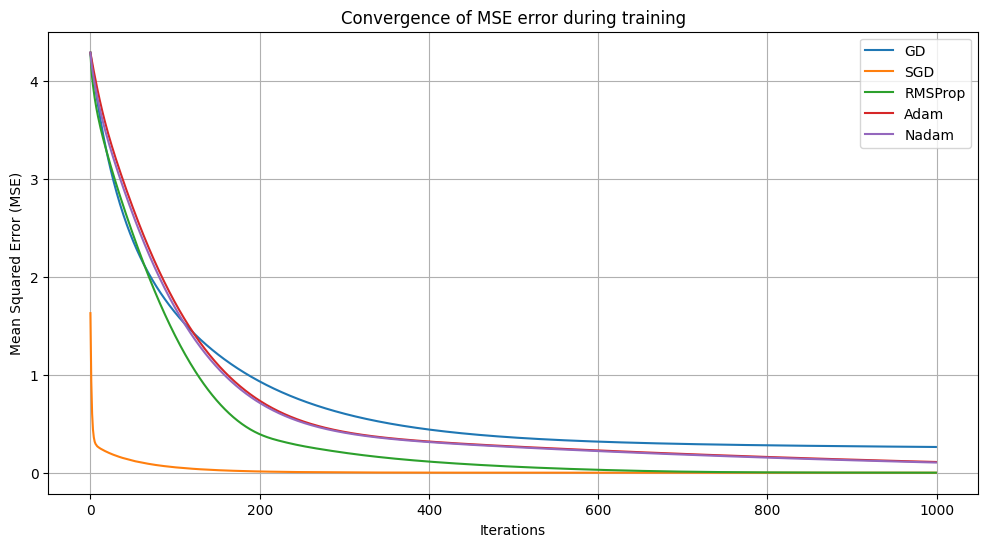

In [80]:
n_iterations = 1000
learning_rate = 0.01

_, loss_gd = polynomial_regression_gradient_descent(X_poly, y, learning_rate, n_iterations)
_, loss_sgd = polynomial_regression_SGD(X_poly, y, learning_rate, n_iterations)
_, loss_rms = polynomial_regression_rmsprop(X_poly, y, learning_rate, n_iterations)
_, loss_adam = polynomial_regression_adam(X_poly, y, learning_rate, n_iterations)
_, loss_nadam = polynomial_regression_nadam(X_poly, y, learning_rate, n_iterations)

plt.figure(figsize=(12, 6))

plt.plot(loss_gd, label='GD')
plt.plot(loss_sgd, label='SGD')
plt.plot(loss_rms, label='RMSProp')
plt.plot(loss_adam, label='Adam')
plt.plot(loss_nadam, label='Nadam')

plt.title("Convergence of MSE error during training")
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend()
plt.grid(True)
plt.show()


In [81]:
def find_plateau(losses, threshold=1e-6):
    for i in range(1, len(losses)):
        if abs(losses[i] - losses[i - 1]) < threshold:
            return i
    return len(losses)

print("Optimal number of iterations:")
print(f"GD: {find_plateau(loss_gd)}")
print(f"SGD: {find_plateau(loss_sgd)}")
print(f"RMSProp: {find_plateau(loss_rms)}")
print(f"Adam: {find_plateau(loss_adam)}")
print(f"Nadam: {find_plateau(loss_nadam)}")


Optimal number of iterations:
GD: 1000
SGD: 402
RMSProp: 1000
Adam: 1000
Nadam: 1000


In [82]:
# The time is already saved
# Final error
final_losses = {
    "GD": loss_gd[-1],
    "SGD": loss_sgd[-1],
    "RMSProp": loss_rms[-1],
    "Adam": loss_adam[-1],
    "Nadam": loss_nadam[-1]
}

# Optimal number of iterations
iterations_needed = {
    "GD": find_plateau(loss_gd),
    "SGD": find_plateau(loss_sgd),
    "RMSProp": find_plateau(loss_rms),
    "Adam": find_plateau(loss_adam),
    "Nadam": find_plateau(loss_nadam)
}

# Time (previously collected)
times = {
    "GD": time_gd,
    "SGD": time_sgd,
    "RMSProp": time_rms,
    "Adam": time_adam,
    "Nadam": time_nadam
}


In [83]:
comparison_df = pd.DataFrame({
    "Method": ["GD", "SGD", "RMSProp", "Adam", "Nadam"],
    "Time (sec)": [times["GD"], times["SGD"], times["RMSProp"], times["Adam"], times["Nadam"]],
    "Final MSE": [final_losses["GD"], final_losses["SGD"], final_losses["RMSProp"], final_losses["Adam"], final_losses["Nadam"]],
    "Optimal iterations": [iterations_needed["GD"], iterations_needed["SGD"], iterations_needed["RMSProp"], iterations_needed["Adam"], iterations_needed["Nadam"]],
})

print(comparison_df)


    Method  Time (sec)     Final MSE  Optimal iterations
0       GD    0.004818  2.627486e-01                1000
1      SGD    0.319911  8.657338e-07                 402
2  RMSProp    0.006186  4.276517e-04                1000
3     Adam    0.006769  1.097347e-01                1000
4    Nadam    0.008052  1.038825e-01                1000


**CONCLUSIONS:**

* For small polynomial regression problems, Adam and Nadam give the best results - fast, accurate, stable.
* If simplicity is important - you can use regular GD, but you will have to wait for more iterations.
* SGD is better suited for large data, but is inferior to other methods in stability on small samples.